In [1]:
import os
from datetime import datetime as dt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from datagenic_rest_client.datagenic import DataGenic
from tshistory.api import timeseries
import matplotlib.pyplot as plt
from DG import get_prices_df

datagenic_rest_server = "http://lon-qdev-ap11"
tsa = timeseries('http://tst-qdev-ap9.petroineos.local/api')

d = DataGenic(
    url_rest_wrapper=datagenic_rest_server, datagenic_url=os.environ["datagenicserver"],
  datagenic_username=os.environ["datagenicusername"], datagenic_password=os.environ["datagenicpassword"])

In [2]:
model_dict = {
    'lmm':"model://ICE_BRT_MM/EU.OIL.NTHSEA.ICE.AFT1MIN.BRENT.IND.M01",
    'platts_dated':"model://PLATTS_RI/PLATTS.CRUDE.RI.PCAAS00/MID/ALL"
    }

df = get_prices_df(model_dict, dt(2000,1,1)).dropna()
df['pricing'] = df['lmm'] - df['platts_dated']
# data = df.drop(columns=['brentm1','brentm2'])

In [113]:
def convert_seasonal(series):
    df = series.resample('d').asfreq().interpolate().to_frame()
    df['year'] = df.index.year
    df['month'] = df.index.month
    df['day'] = df.index.day
    return df.groupby(['year', 'month', 'day']).mean().unstack(level=0)

In [114]:
pricing = convert_seasonal(df['pricing'])

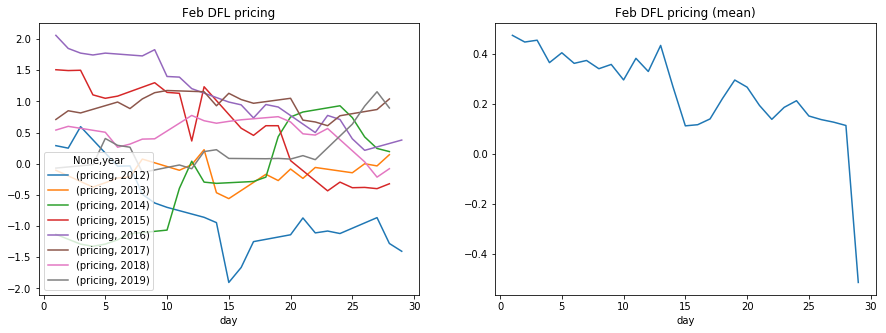

In [129]:
fig, ax = plt.subplots(ncols=2)
convert_seasonal(df['pricing'].loc['2012':'2019']).loc[2].plot(figsize=(15,5), title=f'Feb DFL pricing', ax=ax[0])
convert_seasonal(df['pricing'].loc['2012':'2019']).loc[2].mean(axis=1).plot(title=f'Feb DFL pricing (mean)', ax=ax[1])

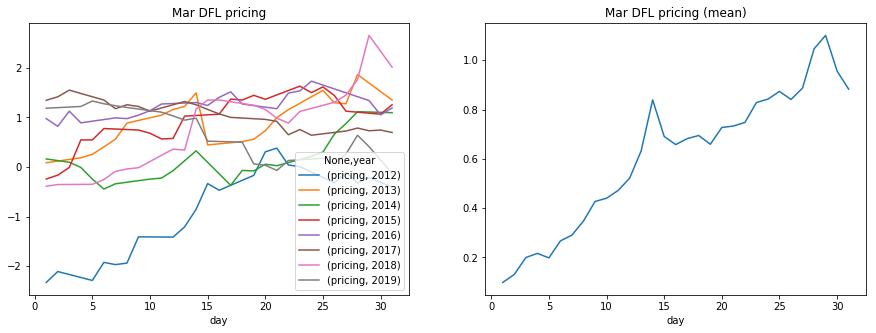

In [130]:
fig, ax = plt.subplots(ncols=2)
convert_seasonal(df['pricing'].loc['2012':'2019']).loc[3].plot(figsize=(15,5), title=f'Mar DFL pricing', ax=ax[0])
convert_seasonal(df['pricing'].loc['2012':'2019']).loc[3].mean(axis=1).plot(title=f'Mar DFL pricing (mean)', ax=ax[1])

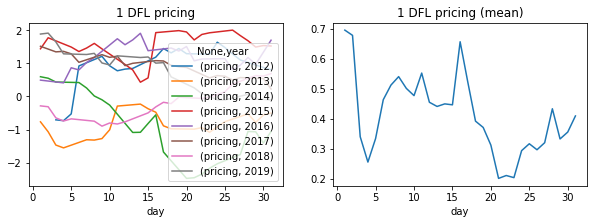

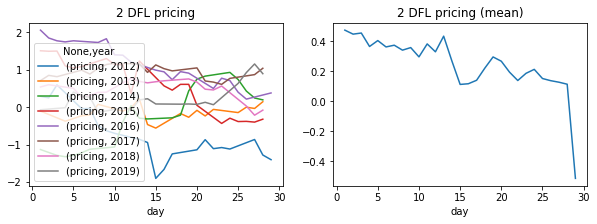

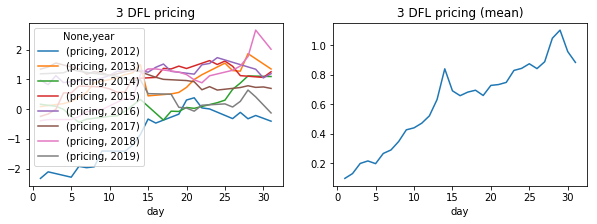

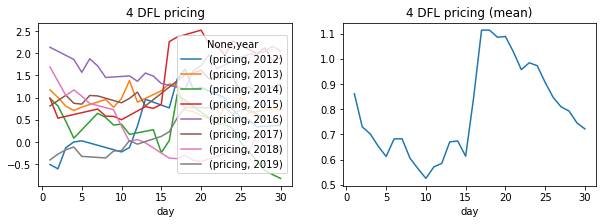

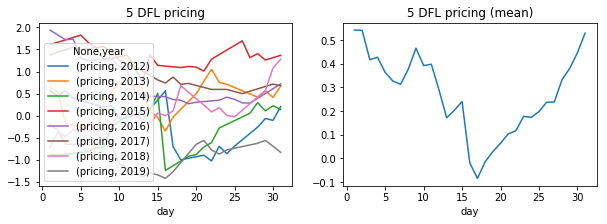

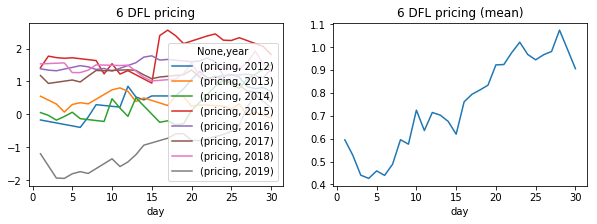

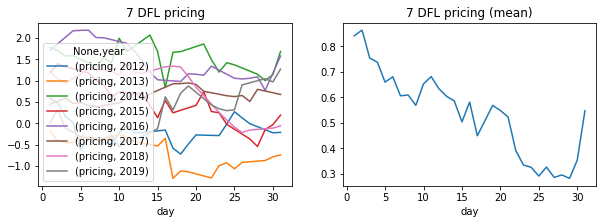

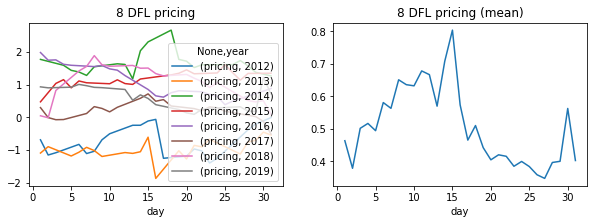

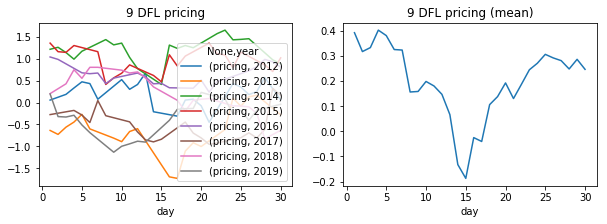

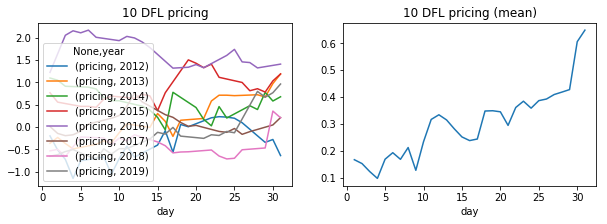

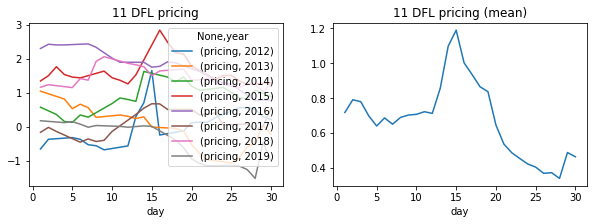

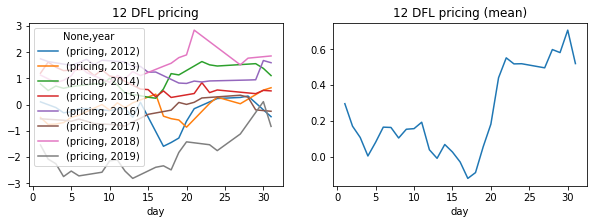

In [124]:
for i in range(1,13):
    fig, ax = plt.subplots(ncols=2)
    convert_seasonal(df['pricing'].loc['2012':'2019']).loc[i].plot(figsize=(10,3), title=f'{i} DFL pricing', ax=ax[0])
    convert_seasonal(df['pricing'].loc['2012':'2019']).loc[i].mean(axis=1).plot(title=f'{i} DFL pricing (mean)', ax=ax[1])